In [50]:
#fichier sous la forme d'un dataframe
from gensim import models
import pandas as pd
cbow_model = models.KeyedVectors.load_word2vec_format("../data/tunning/cbow.kv")
data = pd.DataFrame(cbow_model.vectors)
data.index = cbow_model.index_to_key 

import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt

X = data.values
#nombre d'observations n et de variables p
n = data.shape[0]
p = data.shape[1]

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components = 10)

pca.fit(X_scaled)

coord = pca.fit_transform(X_scaled)

print(coord.shape)

(7231, 10)


In [25]:
#variance expliquée
eigval = (n-1)/n*pca.explained_variance_
eigval

array([26.35648   ,  0.8530232 ,  0.68219143,  0.5061637 ,  0.37036496,
        0.2298812 ,  0.20696495,  0.10333753,  0.0837577 ,  0.07774901],
      dtype=float32)

In [53]:
#proportion de variance expliquée
prop_var=pca.explained_variance_ratio_
prop_var

array([0.8785502 , 0.02843413, 0.0227397 , 0.01687212, 0.01234553,
       0.00766271, 0.00689884, 0.00344459, 0.00279192, 0.00259161],
      dtype=float32)

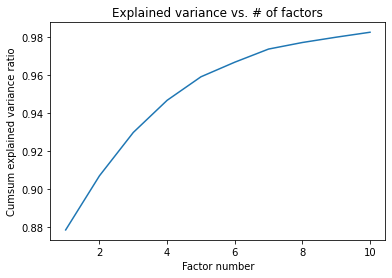

In [54]:
#cumul de variance expliquée
p=10
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

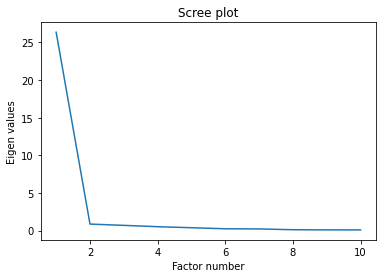

In [27]:
#scree plot
p=10
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

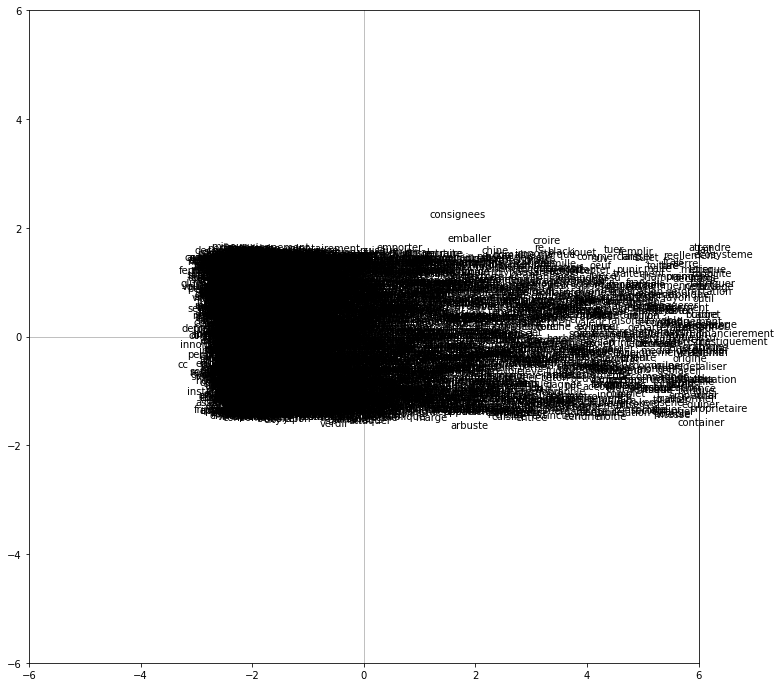

In [28]:
#Individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
 plt.annotate(data.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

<AxesSubplot:>

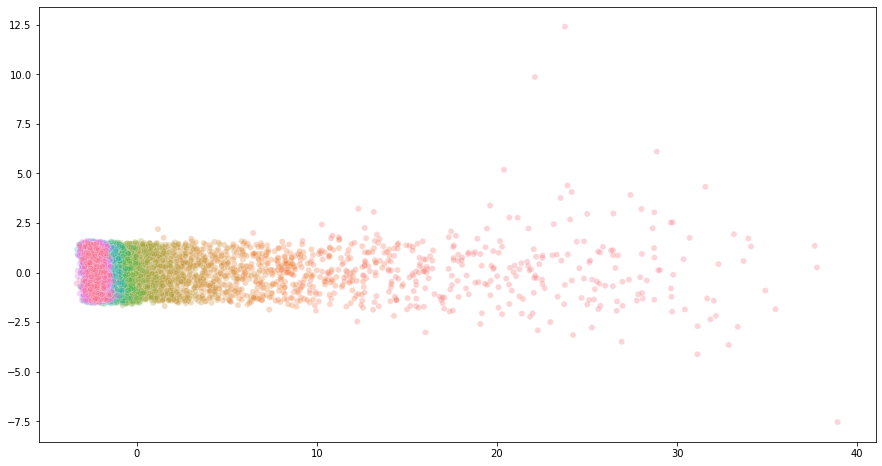

In [49]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.scatterplot(
    x=coord[:,0], y=coord[:,1],
    hue=data.index,
    data=data,
    legend=False,
    alpha=0.3
)

In [36]:
#corrélation des variables avec les axes
p=10
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,1:11] * np.sqrt(eigval[k])

corvar

array([[ 9.82497752e-01,  1.50917051e-02,  1.64160207e-02,
        -1.56273879e-02,  1.85241904e-02, -1.02328574e-02,
        -2.10183747e-02,  6.68205274e-03, -5.76664321e-03,
         2.60886247e-03],
       [-9.62375820e-01, -3.21400389e-02, -3.55408923e-03,
         2.44309604e-02, -4.43247706e-02,  1.68454647e-02,
        -2.97763348e-02, -5.84819205e-02,  6.57330267e-03,
         9.74106193e-02],
       [ 9.94341612e-01,  1.22304242e-02,  1.67964734e-02,
        -2.12678816e-02,  2.24250671e-03, -1.70030762e-02,
        -2.71661878e-02, -7.94988032e-03, -3.31413117e-03,
        -2.52482225e-03],
       [-4.03200924e-01,  9.11930740e-01, -9.34655499e-03,
         4.56327247e-03, -6.66672140e-02,  3.22318799e-03,
        -3.41292545e-02, -7.55850412e-03,  1.89102418e-03,
        -2.55115516e-03],
       [-9.65665162e-01, -6.42852485e-03, -2.98276339e-02,
         2.62006931e-02,  1.33405358e-03,  3.10781617e-02,
         6.52227923e-02,  2.78648976e-02,  1.08561374e-01,
        -1.

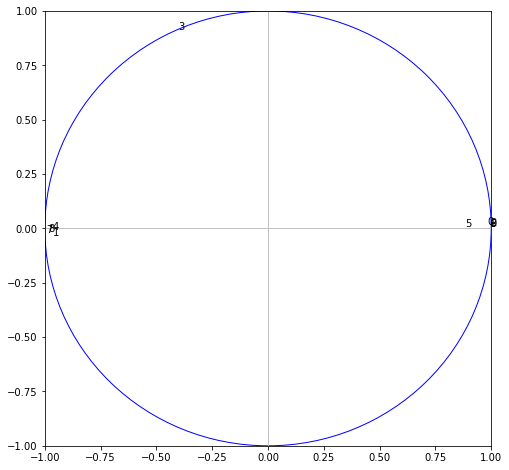

In [37]:
#Variables

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]))
 
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()
